In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Data acquiring

In [218]:
# Reading the spotify songs dataset
spotify_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
spotify_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [219]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Data cleaning

In [220]:
# Removing unwanted columns
spotify_df = spotify_df.drop(columns=['track_id','track_name','track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id'])

In [221]:
# Checking for null values
spotify_df.isna().sum()

track_artist         5
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [222]:
# removing the rows with null values
spotify_df.dropna(inplace=True)

In [223]:
spotify_df.isna().sum()

track_artist         0
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

# Data Preprocessing

In [224]:
# scaling the numerical columns using Standard Scaler
scaler = StandardScaler()
# 13 numerical columns
spotify_df[['track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']] = scaler.fit_transform(spotify_df[['track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']])

In [225]:
spotify_df = spotify_df.sample(frac=1) # to shuffle the dataset
spotify_df.head()

,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
27245,Naeleck,-0.739931,edm,electro house,-0.109246,0.101692,-1.488003,0.415088,0.876132,0.720066,-0.792163,-0.197822,2.156845,-1.023195,0.264963,0.926759
26855,Mike Williams,0.260866,edm,electro house,0.449030,0.455453,0.173348,0.583729,-1.141381,-0.495072,-0.720501,-0.377977,0.160874,-0.692933,0.190325,-0.208301
5479,The Peach Fuzz,-0.059389,pop,indie poptimism,-1.473920,1.002677,-0.380435,0.291618,-1.141381,-0.623397,-0.798101,-0.376058,1.243105,0.499443,1.185410,-0.519187
4798,The Summercamp,-0.059389,pop,indie poptimism,-0.467645,-0.882206,1.280916,-0.029268,0.876132,-0.468420,-0.627622,-0.377985,0.160874,0.748212,1.907629,0.164487
21829,Maxwell,0.901376,r&b,urban contemporary,0.676476,-1.258077,-1.488003,-1.258274,0.876132,-0.743825,-0.431848,-0.244646,-0.383482,1.147100,-0.923519,2.011114


In [226]:
spotify_df['playlist_genre'].unique() # all the playlist genre of this dataset

array(['edm', 'pop', 'r&b', 'latin', 'rap', 'rock'], dtype=object)

In [227]:
# Now encoding the string values into integer values
le = LabelEncoder()
categorical_features = ['track_artist','playlist_genre', 'playlist_subgenre']
for feature in categorical_features:
    spotify_df[feature] = le.fit_transform(spotify_df[feature])
spotify_df.head()

,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
27245,6688,-0.739931,0,4,-0.109246,0.101692,-1.488003,0.415088,0.876132,0.720066,-0.792163,-0.197822,2.156845,-1.023195,0.264963,0.926759
26855,6385,0.260866,0,4,0.449030,0.455453,0.173348,0.583729,-1.141381,-0.495072,-0.720501,-0.377977,0.160874,-0.692933,0.190325,-0.208301
5479,9389,-0.059389,2,10,-1.473920,1.002677,-0.380435,0.291618,-1.141381,-0.623397,-0.798101,-0.376058,1.243105,0.499443,1.185410,-0.519187
4798,9451,-0.059389,2,10,-0.467645,-0.882206,1.280916,-0.029268,0.876132,-0.468420,-0.627622,-0.377985,0.160874,0.748212,1.907629,0.164487
21829,6203,0.901376,3,23,0.676476,-1.258077,-1.488003,-1.258274,0.876132,-0.743825,-0.431848,-0.244646,-0.383482,1.147100,-0.923519,2.011114


In [228]:
# splitting feature and label for training
X = spotify_df.drop('playlist_genre',axis=1)
y = spotify_df['playlist_genre']
# splitting the train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model training

Decision Tree
Running time: 0.17224526405334473 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       1.00      1.00      1.00      1040
           2       1.00      1.00      1.00      1134
           3       1.00      1.00      1.00      1125
           4       1.00      1.00      1.00      1156
           5       1.00      1.00      1.00       953

    accuracy                           1.00      6566
   macro avg       1.00      1.00      1.00      6566
weighted avg       1.00      1.00      1.00      6566



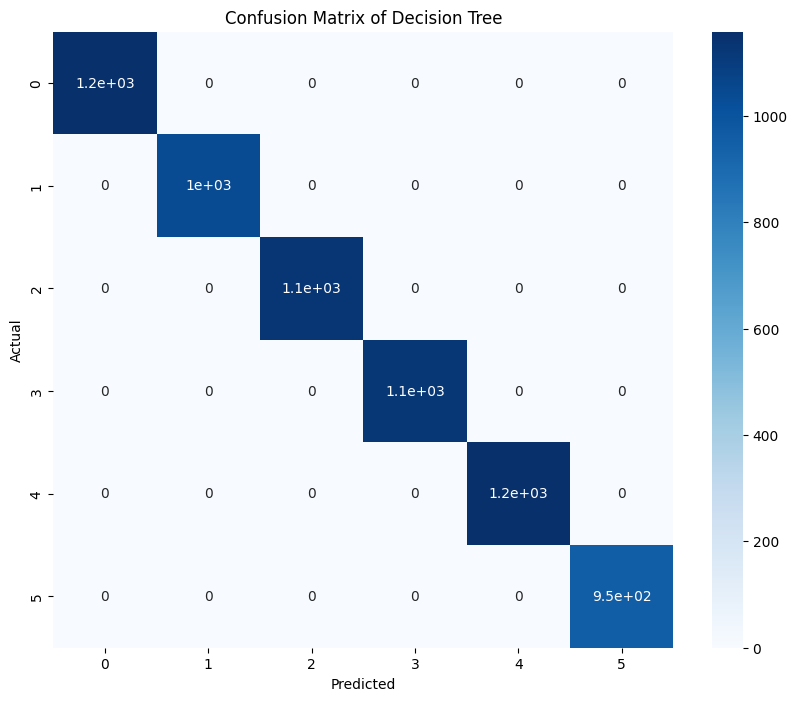

Naive Bayes Classifier
Running time: 0.03103947639465332 seconds
              precision    recall  f1-score   support

           0       0.55      0.65      0.59      1158
           1       0.42      0.51      0.46      1040
           2       0.44      0.41      0.42      1134
           3       0.47      0.47      0.47      1125
           4       0.58      0.43      0.49      1156
           5       0.64      0.61      0.62       953

    accuracy                           0.51      6566
   macro avg       0.52      0.51      0.51      6566
weighted avg       0.51      0.51      0.51      6566



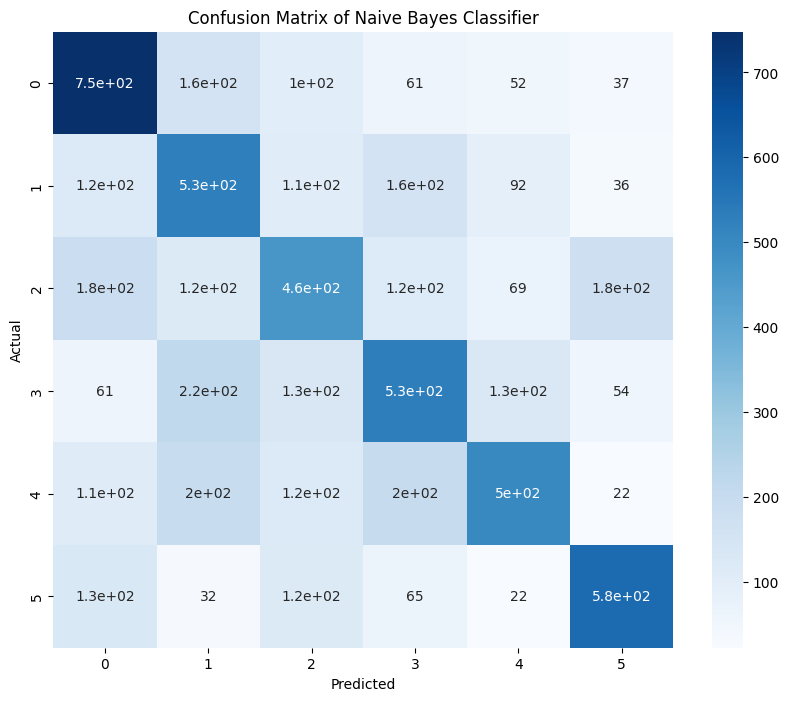

Random Forest
Running time: 8.365121841430664 seconds
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1158
           1       0.94      0.95      0.95      1040
           2       0.90      0.84      0.87      1134
           3       0.93      0.95      0.94      1125
           4       0.97      0.96      0.96      1156
           5       0.95      0.96      0.95       953

    accuracy                           0.93      6566
   macro avg       0.93      0.93      0.93      6566
weighted avg       0.93      0.93      0.93      6566



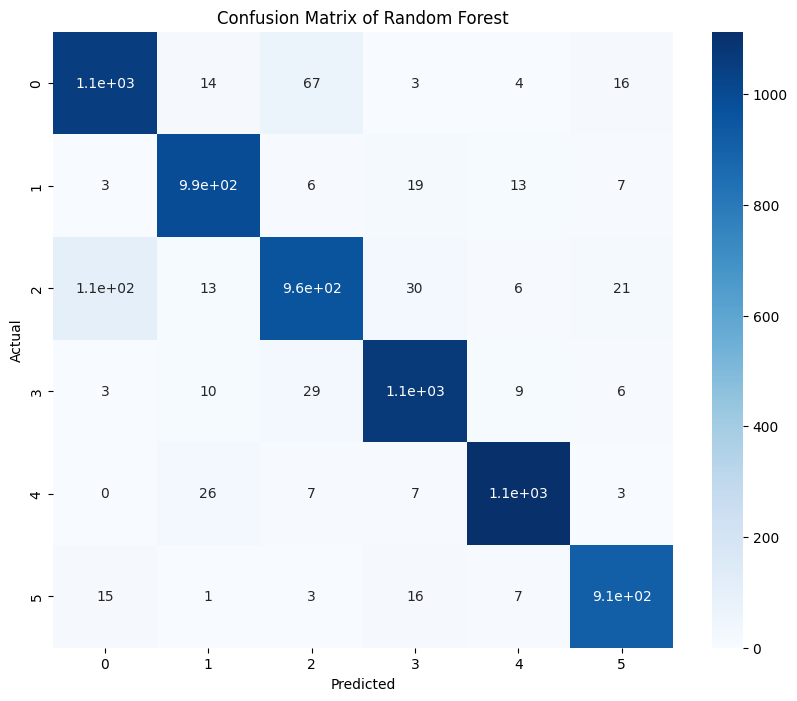

In [229]:
# Three different classification models
models = {
  "Decision Tree": DecisionTreeClassifier(),
  "Naive Bayes Classifier": GaussianNB(),
  "Random Forest": RandomForestClassifier()
}

# training all the models
for name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  y_pred = model.predict(X_test)
  print(name)
  print("Running time:", end_time - start_time, "seconds")
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm, index = range(len(cm)), columns = range(len(cm[0])))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df, annot=True, cmap = 'Blues')

  plt.title('Confusion Matrix of '+name)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

  plt.show()

# Model training after implementing PCA

In [230]:
# splitting the numerical and string values from the dataset
spotify_num = spotify_df.drop(['track_artist',
       'playlist_genre', 'playlist_subgenre'],axis=1)

spotify_str = spotify_df.drop(['track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms'],axis=1)

In [231]:
spotify_num.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
27245,-0.739931,-0.109246,0.101692,-1.488003,0.415088,0.876132,0.720066,-0.792163,-0.197822,2.156845,-1.023195,0.264963,0.926759
26855,0.260866,0.449030,0.455453,0.173348,0.583729,-1.141381,-0.495072,-0.720501,-0.377977,0.160874,-0.692933,0.190325,-0.208301
5479,-0.059389,-1.473920,1.002677,-0.380435,0.291618,-1.141381,-0.623397,-0.798101,-0.376058,1.243105,0.499443,1.185410,-0.519187
4798,-0.059389,-0.467645,-0.882206,1.280916,-0.029268,0.876132,-0.468420,-0.627622,-0.377985,0.160874,0.748212,1.907629,0.164487
21829,0.901376,0.676476,-1.258077,-1.488003,-1.258274,0.876132,-0.743825,-0.431848,-0.244646,-0.383482,1.147100,-0.923519,2.011114


In [232]:
# implementing PCA for different number of components to find optimal number
for i in range(2,len(spotify_num.columns)):
    num_values = spotify_num.loc[:,spotify_num.columns].values
    pca = PCA(n_components = i)
    pca.fit_transform(num_values)
    print(f'components = {i}, {pca.explained_variance_ratio_.sum()}')

components = 2, 0.2892506128163249
components = 3, 0.38334453421713144
components = 4, 0.4726769998959066
components = 5, 0.5534349279302941
components = 6, 0.6296336149904106
components = 7, 0.7042968979797727
components = 8, 0.7699953895354192
components = 9, 0.8321043948582609
components = 10, 0.8941328180003302
components = 11, 0.9415376281082853
components = 12, 0.9830670090193254


In [233]:
# choosing 11 number of components
num_values = spotify_num.loc[:,spotify_num.columns].values
pca = PCA(n_components = 11)
pca_data = pca.fit_transform(num_values)
pca_df = pd.DataFrame(data = pca_data, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11'])

In [234]:
pca_df.shape

(32828, 11)

In [235]:
spotify_str.shape

(32828, 3)

In [236]:
spotify_merged = pd.concat([spotify_str,pca_df],axis=1,join='inner')
spotify_merged.head()

,track_artist,playlist_genre,playlist_subgenre,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
27245,6688,0,4,-0.326195,-2.601759,0.895287,0.626670,-1.897921,0.354174,-0.217910,0.330574,0.632912,-0.194588,0.052587
26855,6385,0,4,-1.516472,-0.836199,-0.596179,0.248377,-1.383581,1.179596,-0.629016,1.489058,0.438524,0.917825,0.260476
5479,9389,2,10,3.396069,0.074202,-0.816747,-0.847478,1.228746,-0.104702,-0.381331,-1.824498,-0.150605,0.817017,-0.178068
4798,9451,2,10,-2.130202,2.365793,-0.178722,0.438483,0.942184,1.043442,-0.783653,0.045624,-0.499347,1.182974,-0.232478
21829,6203,3,23,-1.958936,-0.007522,-0.268094,0.075233,0.104244,-0.100222,0.519134,-0.536708,-0.359840,-1.667470,0.282863


In [237]:
spotify_merged.isna().sum()

track_artist         0
playlist_genre       0
playlist_subgenre    0
pca1                 0
pca2                 0
pca3                 0
pca4                 0
pca5                 0
pca6                 0
pca7                 0
pca8                 0
pca9                 0
pca10                0
pca11                0
dtype: int64

In [238]:
X = spotify_merged.drop('playlist_genre',axis=1)
y = spotify_merged['playlist_genre']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Decision Tree
Running time: 0.24856233596801758 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1198
           1       1.00      1.00      1.00      1031
           2       1.00      1.00      1.00      1153
           3       1.00      1.00      1.00      1088
           4       1.00      1.00      1.00      1130
           5       1.00      1.00      1.00       965

    accuracy                           1.00      6565
   macro avg       1.00      1.00      1.00      6565
weighted avg       1.00      1.00      1.00      6565



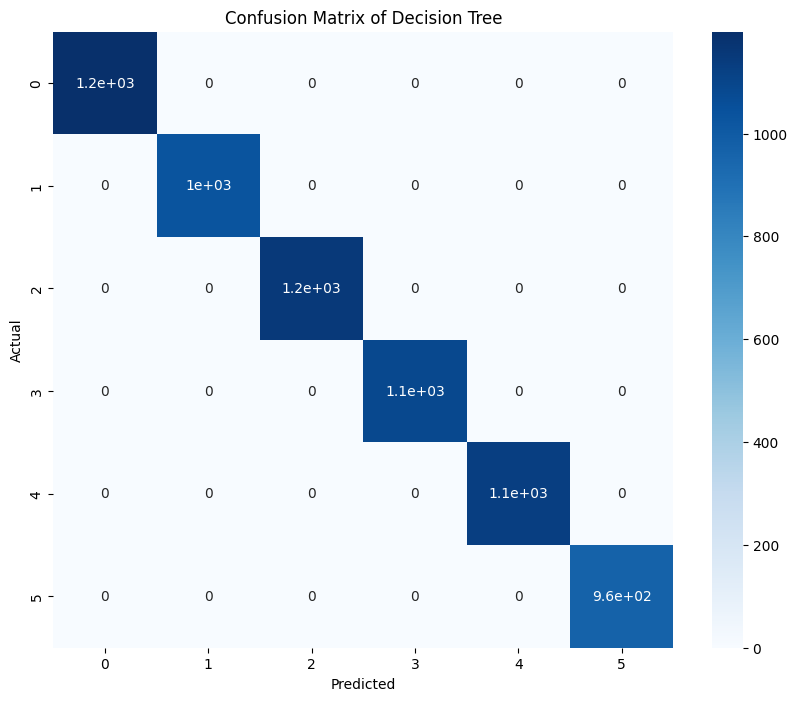

Naive Bayes Classifier
Running time: 0.019305706024169922 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1198
           1       0.16      0.23      0.19      1031
           2       0.28      0.42      0.34      1153
           3       0.34      0.37      0.36      1088
           4       0.19      0.09      0.12      1130
           5       0.34      0.52      0.41       965

    accuracy                           0.26      6565
   macro avg       0.22      0.27      0.24      6565
weighted avg       0.21      0.26      0.23      6565



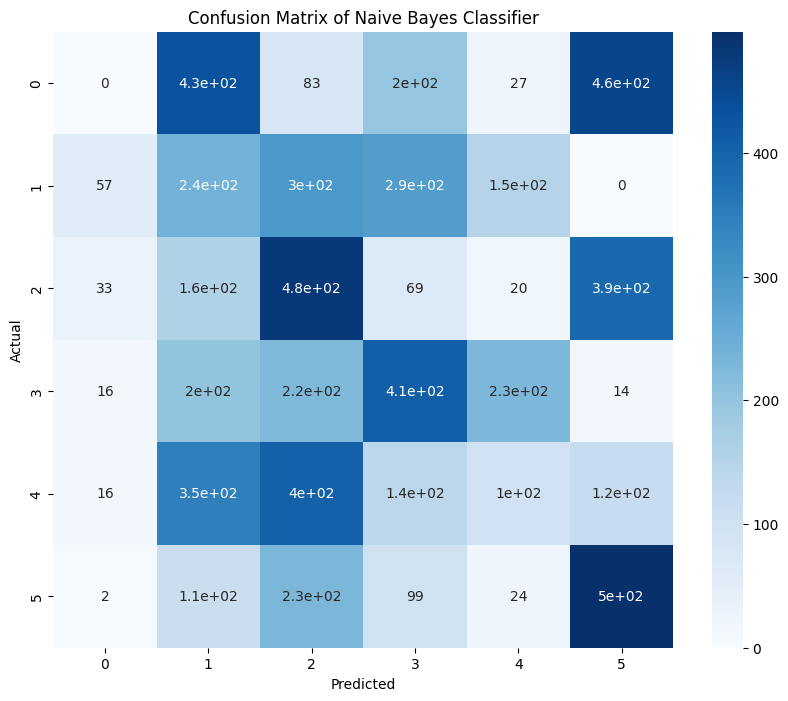

Random Forest
Running time: 13.34233570098877 seconds
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1198
           1       1.00      1.00      1.00      1031
           2       1.00      0.97      0.98      1153
           3       0.99      1.00      1.00      1088
           4       1.00      1.00      1.00      1130
           5       1.00      1.00      1.00       965

    accuracy                           0.99      6565
   macro avg       0.99      0.99      0.99      6565
weighted avg       0.99      0.99      0.99      6565



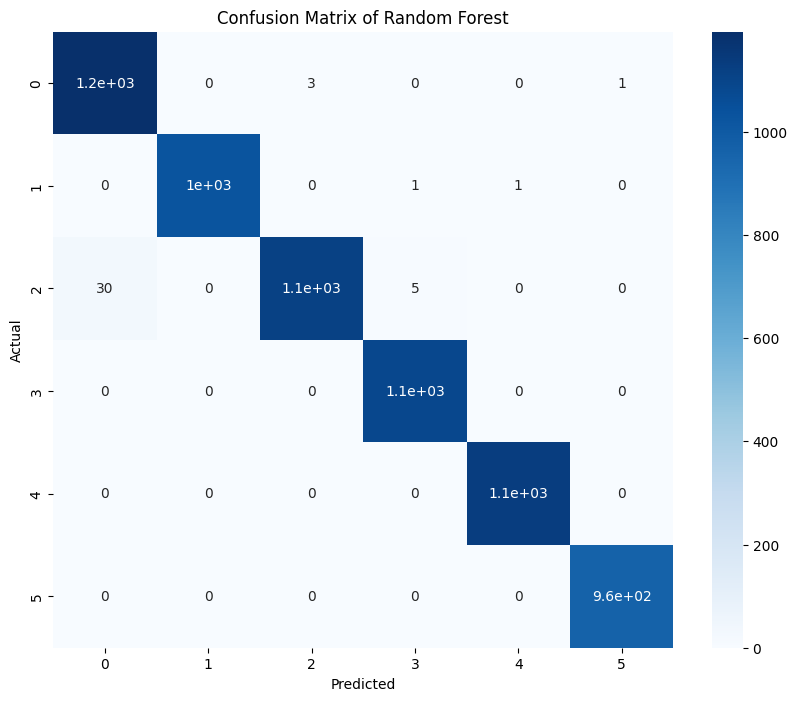

In [239]:
models = {
  "Decision Tree": DecisionTreeClassifier(),
  "Naive Bayes Classifier": GaussianNB(),
  "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  y_pred = model.predict(X_test)
  print(name)
  print("Running time:", end_time - start_time, "seconds")
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm, index = range(len(cm)), columns = range(len(cm[0])))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df, annot=True, cmap = 'Blues')

  plt.title('Confusion Matrix of '+name)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

  plt.show()